In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import acquire as acq
import prepare as prep
import evaluate as ev
import stats_conclude as sc

Load In successful, awaiting commands...
Load In successful, awaiting commands...


> ## Acquire

Use titanic dataset

In [2]:
df = acq.get_titanic_data()
df.head()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


> ## Prepare

Clean the data

In [3]:
dft = prep.clean_titanic(df)
dft.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sex                      891 non-null    object 
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              891 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 72.2+ KB


In [5]:
# dropping additional unnecessary columns
dft.drop(columns=['passenger_id', 'sex', 'embark_town'], inplace=True)

In [6]:
dft.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


Split the data

In [7]:
# splitting and verifying size of samples are adequate
train, validate, test = prep.split_titanic(dft)

In [8]:
train.shape, validate.shape, test.shape

((534, 9), (178, 9), (179, 9))

In [9]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


> ## Explore

In [10]:
import explore

survived
pclass
sibsp
parch
fare
alone
sex_male
embark_town_Queenstown
embark_town_Southampton

SURVIVED
0    549
1    342
Name: survived, dtype: int64
0    61.616162
1    38.383838
Name: survived, dtype: float64


HYPOTHESIZE
H_0: survived does not affect survived
H_a: survived affects survived

VISUALIZE


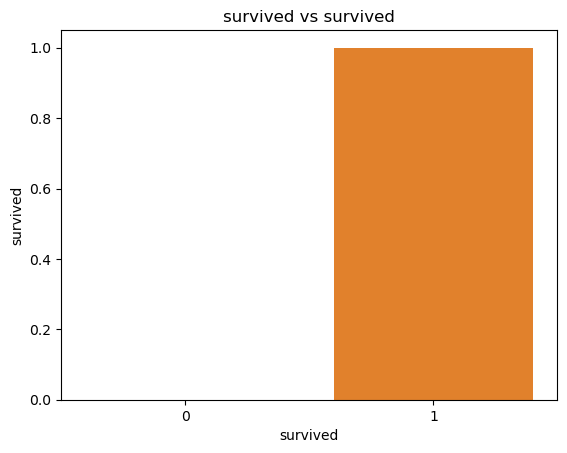


ANALYZE and SUMMARIZE
Observed
[[549   0]
 [  0 342]]

Expected
[[338 210]
 [210 131]]

----
chi^2 = 886.7768
p-value = 0.0000
----
We reject the null hypothesis.




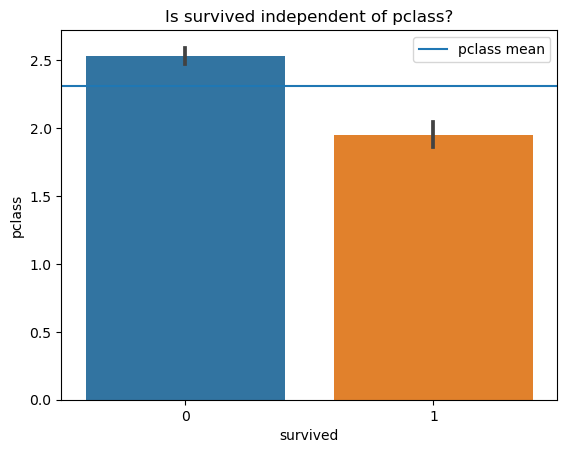

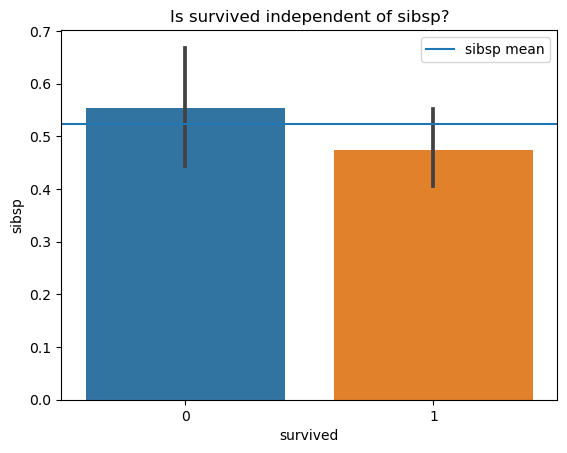

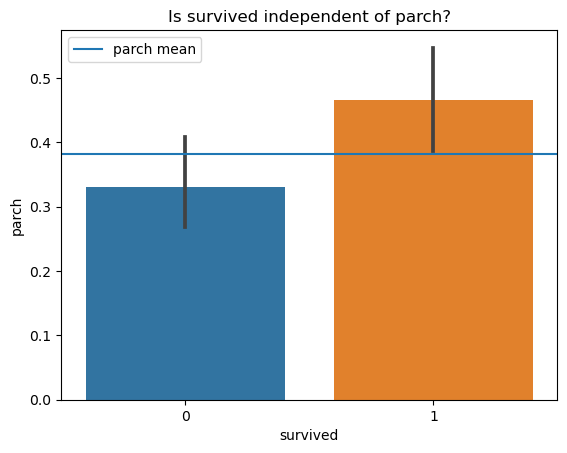

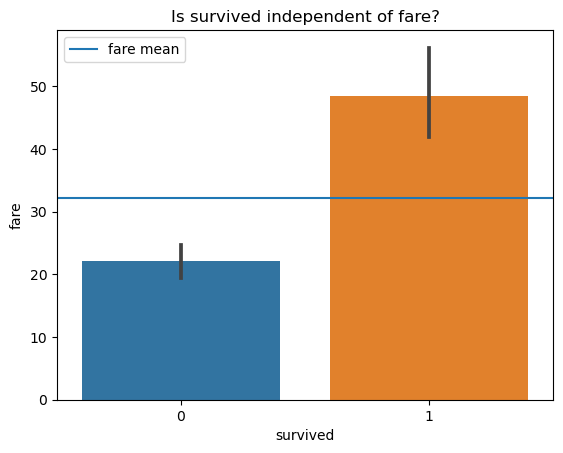



ALONE
1    537
0    354
Name: alone, dtype: int64
1    60.26936
0    39.73064
Name: alone, dtype: float64


HYPOTHESIZE
H_0: alone does not affect survived
H_a: alone affects survived

VISUALIZE


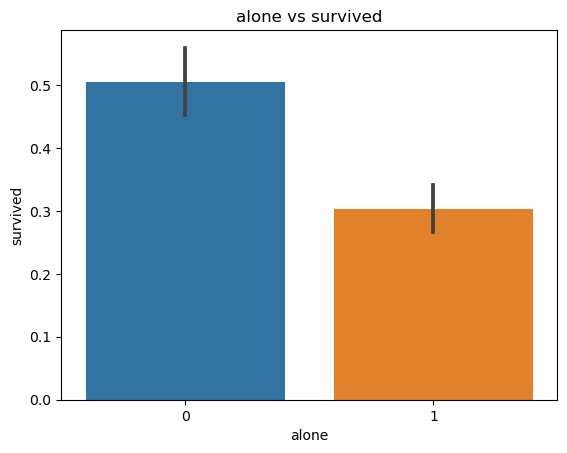


ANALYZE and SUMMARIZE
Observed
[[175 179]
 [374 163]]

Expected
[[218 135]
 [330 206]]

----
chi^2 = 36.0005
p-value = 0.0000
----
We reject the null hypothesis.



SEX_MALE
1    577
0    314
Name: sex_male, dtype: int64
1    64.758698
0    35.241302
Name: sex_male, dtype: float64


HYPOTHESIZE
H_0: sex male does not affect survived
H_a: sex male affects survived

VISUALIZE


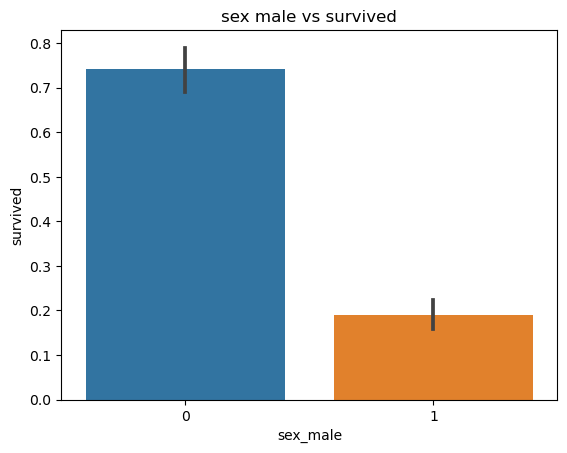


ANALYZE and SUMMARIZE
Observed
[[ 81 233]
 [468 109]]

Expected
[[193 120]
 [355 221]]

----
chi^2 = 260.7170
p-value = 0.0000
----
We reject the null hypothesis.



EMBARK_TOWN_QUEENSTOWN
0    814
1     77
Name: embark_town_Queenstown, dtype: int64
0    91.358025
1     8.641975
Name: embark_town_Queenstown, dtype: float64


HYPOTHESIZE
H_0: embark town queenstown does not affect survived
H_a: embark town queenstown affects survived

VISUALIZE


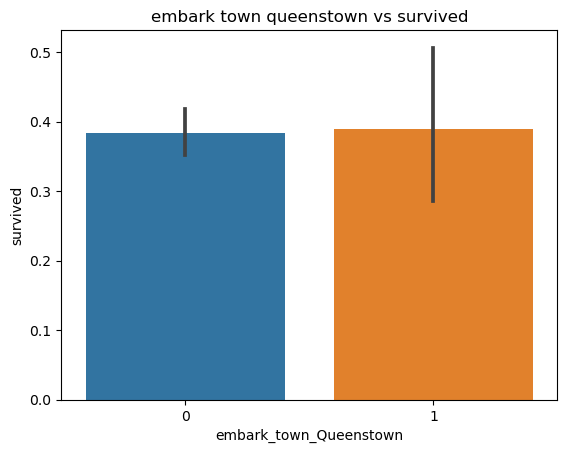


ANALYZE and SUMMARIZE
Observed
[[502 312]
 [ 47  30]]

Expected
[[501 312]
 [ 47  29]]

----
chi^2 = 0.0000
p-value = 1.0000
----
We fail to reject the null hypothesis.



EMBARK_TOWN_SOUTHAMPTON
1    646
0    245
Name: embark_town_Southampton, dtype: int64
1    72.502806
0    27.497194
Name: embark_town_Southampton, dtype: float64


HYPOTHESIZE
H_0: embark town southampton does not affect survived
H_a: embark town southampton affects survived

VISUALIZE


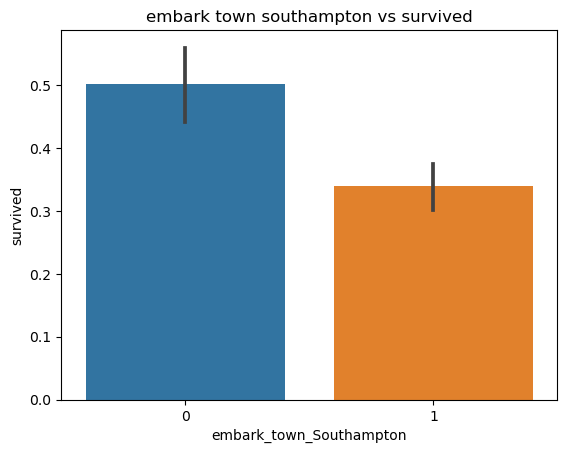


ANALYZE and SUMMARIZE
Observed
[[122 123]
 [427 219]]

Expected
[[150  94]
 [398 247]]

----
chi^2 = 19.2794
p-value = 0.0000
----
We reject the null hypothesis.




In [11]:
explore.explore(dft, 'survived')

> ## Explore the Numerical Stats

## Visuals are Unclear - Perform Stats Test
### Fare and P-Class

`Which test do we use?`
* Chi^2 because we are comparing categoricals

-----

$H_0$: survival is independent of p-class

$H_a$: survival is dependent of p-class

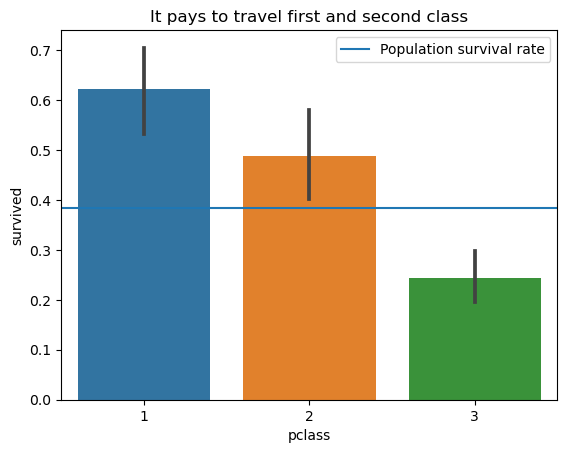

In [12]:
plt.title("It pays to travel first and second class")
sns.barplot(x="pclass", y="survived", data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [13]:
# Let's run a chi squared to compare proportions, to have more confidence
# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.survived, train.pclass)
acq.chi2_test(observed)
print(f"Survival is dependent on pclass.")

Observed
[[ 46  60 223]
 [ 76  57  72]]

Expected
[[ 75  72 181]
 [ 46  44 113]]

----
chi^2 = 59.1404
p-value = 0.0000
----
We reject the null hypothesis.
Survival is dependent on pclass.


### `Which test do we use?`
* TTest because we are comparing a continous and a categorical variable
    * check for distribution before continuing

-----
$H_0$: survival is independent of fare

$H_a$: survival is dependent of fare

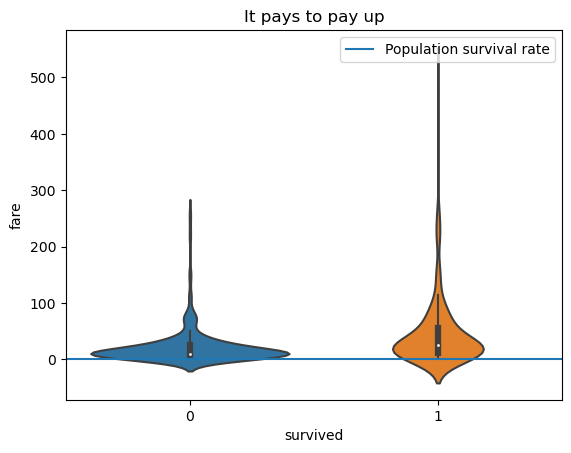

In [14]:
plt.title("It pays to pay up")
sns.violinplot(x="survived", y="fare", data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

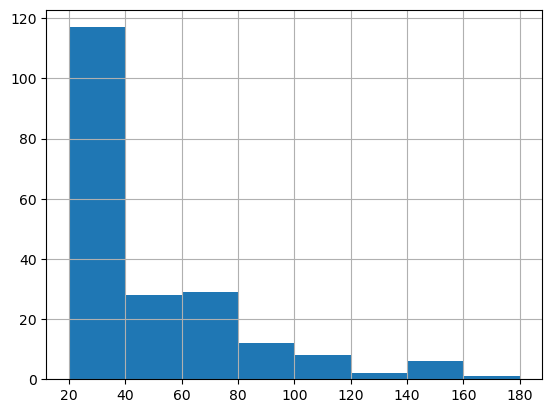

In [15]:
# check for distribution
train.fare.hist(bins=(20,40,60,80,100,120,140,160,180))
plt.show()

Not normally distributed - proceed with Mann Whitney U test

In [18]:
def conclude_mannwhitneyu(subpop1, subpop2):
    α = 0.05
    t, p = stats.mannwhitneyu(subpop1, subpop2)
    print(f"T-Stat = {t}")
    print(f'P-Value = {p}')
    if p < α:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")

In [19]:
conclude_mannwhitneyu(train.survived, train.fare)

T-Stat = 3325.5
P-Value = 9.878212053853434e-175
We reject the null hypothesis.


In [20]:
α = 0.05
t, p = stats.mannwhitneyu(train.survived, train.fare)
p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

9.878212053853434e-175
We reject the null hypothesis


## `Takeaways`


* Significant:
    * pclass, fare, alone, gender

* Not Significant:
    * emabark_town_queenstown, sibsp, parch

In [21]:
train.columns.tolist()

['survived',
 'pclass',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [22]:
target = 'survived'

In [23]:
X_train = train[[
 'pclass',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Southampton']]
X_validate = validate[[
 'pclass',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Southampton']]
X_test = test[[
 'pclass',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Southampton']]
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

> ## Model

In [24]:
def random_forest_eval(X_train, y_train, X_validate, y_validate):
    ''' This function is to calculate the best random forest decision tree model by running 
    a for loop to explore the max depth per default range (1,20).

    The loop then makes a list of lists of all max depth calculations, compares the
    accuracy between train and validate sets, turns to df, and adds a new column named
    difference. The function then calculates the baseline accuracy and plots the
    baseline, and the train and validate sets to identify where overfitting occurs.
    '''
    scores_all=[]

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    import warnings
    warnings.filterwarnings("ignore")

    for x in range(1,11):
        rf = RandomForestClassifier(random_state = 123,max_depth = x)
        rf.fit(X_train, y_train)
        train_acc = rf.score(X_train, y_train)
        print(f"For depth of {x:2}, the accuracy is {round(train_acc,2)}")
        
        # establish feature importance variable
        important_features = rf.feature_importances_
        
        # evaluate on validate set
        validate_acc = rf.score(X_validate, y_validate)

        # append to df scores_all
        scores_all.append([x, train_acc, validate_acc])

        # turn to df
        scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'validate_acc'])

        # make new column
        scores_df['difference'] = scores_df.train_acc - scores_df.validate_acc

        # sort on difference
        scores_df.sort_values('difference')

        # establish baseline accuracy
    baseline_accuracy = (y_train == 0).mean()
    print()
    print(f'The baseline accuracy is {round(baseline_accuracy,2)}')
          
        # plot to visulaize train and validate accuracies for best fit
    plt.figure(figsize=(12,8))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.validate_acc, label='validate', marker='o')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xlabel('Max Depth for Random Forest')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,11, step=1))
    plt.title('Where do I begin to overfit?')
    plt.legend()
    plt.show()
    
        # plot feature importance
    plt.figure(figsize=(12,12))
    plt.bar(X_train.columns, important_features)
    plt.title(f"Feature Importance")
    plt.xlabel(f"Features")
    plt.ylabel(f"Importance")
    plt.xticks(rotation = 60)
    plt.show()

For depth of  1, the accuracy is 0.78
For depth of  2, the accuracy is 0.78
For depth of  3, the accuracy is 0.82
For depth of  4, the accuracy is 0.85
For depth of  5, the accuracy is 0.86
For depth of  6, the accuracy is 0.87
For depth of  7, the accuracy is 0.9
For depth of  8, the accuracy is 0.93
For depth of  9, the accuracy is 0.93
For depth of 10, the accuracy is 0.93

The baseline accuracy is 0.62


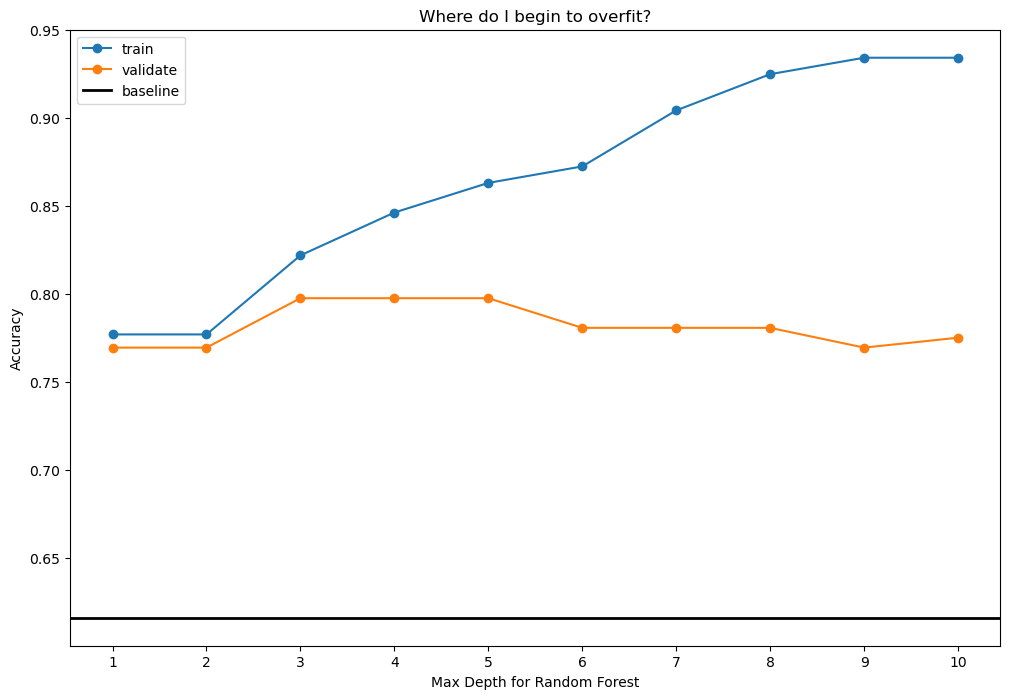

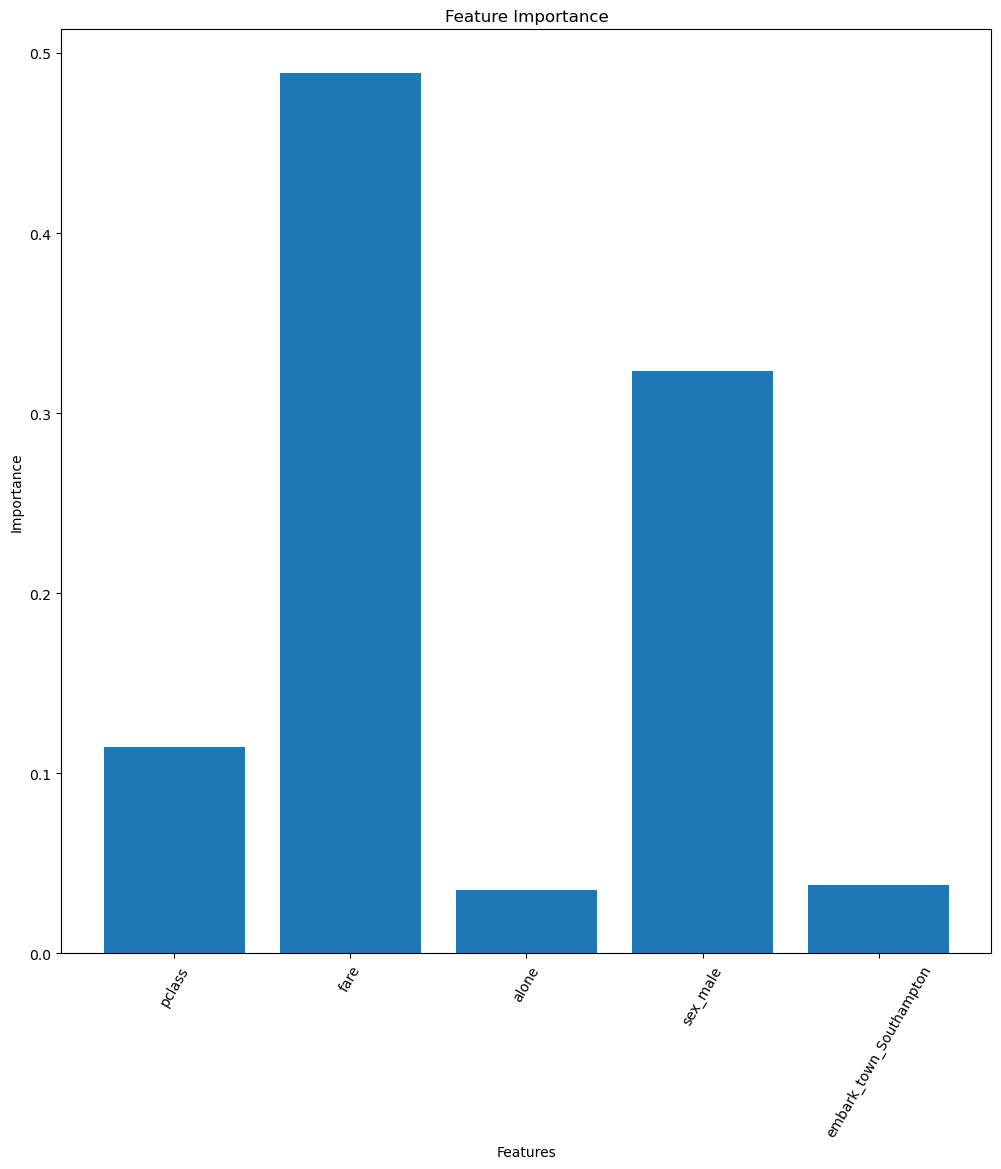

In [25]:
random_forest_eval(X_train, y_train, X_validate, y_validate)

## `Takeaways`

A max depth of 3 is just beginning to overfit. All models beat the baseline. 

Paying more for a ticket increased your survival chance. Additionally, being female increased your survival chance as well.